# Mineração de Dados - Trabalho 04
## Rômulo Freire Férrer Filho - 385218

Esse trabalho tem como objetivo explorar um conjunto de dados de notícias relacionadas à eleição presidencial de 2016 dos Estados Unidos e classificar as notícias como verdadeiras ou falsas.

Importando bibliotecas necessárias

In [28]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, plot_confusion_matrix


Lendo o dataset de notícias

In [2]:
data = pd.read_csv('noticias.csv', index_col=0)
data.head()

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Vamos juntar título e notícias numa única coluna para facilitar o processamento.

In [4]:
data['fulltext'] = data['title'].str.cat(data['text'], sep='. ')
df = data.copy()
df = df.drop(columns=['title', 'text'])
df

,label,fulltext
8476,FAKE,You Can Smell Hillary’s Fear. Daniel Greenfiel...
10294,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
3608,REAL,Kerry to go to Paris in gesture of sympathy. U...
10142,FAKE,Bernie supporters on Twitter erupt in anger ag...
875,REAL,The Battle of New York: Why This Primary Matte...
...,...,...
4490,REAL,State Department says it can't find emails fro...
8062,FAKE,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
8622,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...
4021,REAL,"In Ethiopia, Obama seeks progress on peace, se..."


## Divisão treino x teste
A coluna ```fulltext``` será utilizada como vetor de entrada (X) e a coluna ```label``` como o vetor de saída (y) 

In [5]:
X = df['fulltext'].tolist()
y = df['label'].tolist()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

4751 4751
1584 1584


## CountVectorizer
Primeiro vamos utilizar o ```CountVectorizer``` para transformar nosso texto em números de forma que possamos realizar operações com ele.

In [8]:
countVec = CountVectorizer()
X_train_count = countVec.fit_transform(X_train)
X_test_count = countVec.transform(X_test)

In [9]:
X_train_count = X_train_count.toarray()
X_test_count = X_test_count.toarray()

## TF-IDF Vectorizer
Vamo fazer o mesmo processo usando o ```TfidfVectorizer```, faremos uma comparação das duas técnicas em seguida.

In [11]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [12]:
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

## Naive Bayes
Vamos agora criar dois classificadores ```Naive Bayes``` para classificar as notícias em verdadeira ou falso.

In [13]:
nb1 = MultinomialNB() # Count Vectorizer
nb2 = MultinomialNB() # TF-IDF Vectorizer

## Treinando os classificadores

In [15]:
nb1.fit(X_train_count, y_train) # Count Vectorizer

MultinomialNB()

In [16]:
nb2.fit(X_train_tfidf, y_train) # TF-IDF Vectorizer

MultinomialNB()

## Teste
### CountVectorizer:

In [18]:
y_pred_count = nb1.predict(X_test_count)

In [31]:
acc = accuracy_score(y_test, y_pred_count)
print("A precisão do classificador usando o CountVectorizer foi de {} ou seja, {}%.".format(acc, acc*100))

A precisão do classificador usando o CountVectorizer foi de 0.8907828282828283 ou seja, 89.07828282828282%.


### Matriz de confusão
Vamos plotar a matriz de confusão para verificar a performance do nosso classificador.

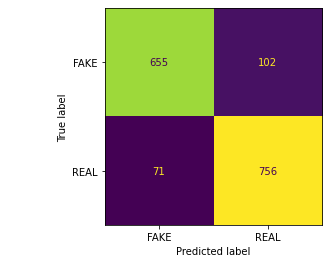

In [32]:
plot_confusion_matrix(nb1, X_test_count, y_test)

### TF-IDFVectorizer:

In [25]:
y_pred_tfidf = nb2.predict(X_test_tfidf)

In [33]:
acc = accuracy_score(y_test, y_pred_tfidf)
print("A precisão do classificador usando o TfidfVectorizer foi de {} ou seja, {}%.".format(acc, acc*100))

A precisão do classificador usando o TfidfVectorizer foi de 0.827020202020202 ou seja, 82.7020202020202%.


### Matriz de Confusão
Plotando a matriz de confusão para este outro classificador

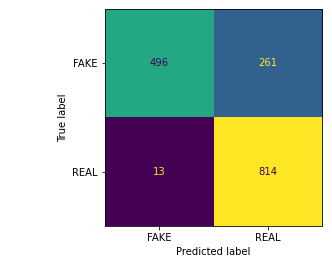

In [30]:
plot_confusion_matrix(nb2, X_test_tfidf, y_test)

## Comparação
Podemos ver pela precisão que o classificador criado utilizando somente o método ```CountVectorizer``` foi melhor que o utilizando ```TfidfVectorizer```, a matriz de confusão confirma essa superioridade, pois vemos uma grande presença de falsos-positivos na segunda matriz